#### IMPORTING THE LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### CONFIGS

In [2]:
tf.__version__

'2.0.0'

In [3]:
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())

True
True


#### LOADING THE DATA

In [4]:
(X_train,Y_train),(X_test,Y_test) = datasets.cifar10.load_data()

### ANALYSING THE SHAPE OF THE DATA

###### CHECKING THE SHAPE,VALUE,DIMENSIONS OF DATA Y_test

In [5]:
Y_train.shape

(50000, 1)

In [6]:
Y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [7]:
Y_train.ndim

2

* AS WE NEED ONLY THE LABELS WE WILL RESHAPE IT TO 1 DIMENSION ARRAY 

In [8]:
Y_train.shape

(50000, 1)

In [9]:
Y_train = Y_train.reshape(-1,)

In [10]:
Y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

##### CHECKING SHAPE OF X_TRAIN

In [11]:
X_train.shape

(50000, 32, 32, 3)

* SHAPE -- > (NO. OF IMAGES,PIXELS,PIXELS,CHANNELS)

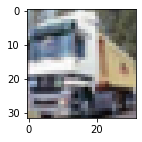

In [12]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [13]:
#### A FUNCTION TO PLOT IMAGES WITH LABELS
def plot_labels(X,Y,index):
    classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])
    plt.show()

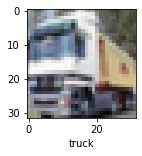

In [14]:
plot_labels(X_train,Y_train,1)

##### SCALING DOWN THE PIXELS OF THE IMAGE

In [15]:
### SCALING DOWN THE PIXELS OF THE IMAGE
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [17]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

##### CREATING A ANN MODEL

In [18]:
ANN = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ANN.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ANN.fit(X_train,Y_train,epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 5s 108us/sample - loss: 1.8583 - accuracy: 0.3355
Epoch 2/5
50000/50000 [==============================] - 5s 94us/sample - loss: 1.6578 - accuracy: 0.4144
Epoch 3/5
50000/50000 [==============================] - 4s 88us/sample - loss: 1.5695 - accuracy: 0.4433
Epoch 4/5
50000/50000 [==============================] - 4s 89us/sample - loss: 1.5081 - accuracy: 0.4695
Epoch 5/5
50000/50000 [==============================] - 4s 88us/sample - loss: 1.4585 - accuracy: 0.4877


#### CREATING A CNN MODEL

In [23]:
cnn = models.Sequential([
    
        # CNN
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        
        
        
        # Dense Layers
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(64,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='Adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train,Y_train,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 80us/sample - loss: 1.5127 - accuracy: 0.4526
Epoch 2/10
50000/50000 [==============================] - 3s 69us/sample - loss: 1.2144 - accuracy: 0.5708
Epoch 3/10
50000/50000 [==============================] - 3s 70us/sample - loss: 1.1023 - accuracy: 0.6112
Epoch 4/10
50000/50000 [==============================] - 4s 72us/sample - loss: 1.0141 - accuracy: 0.6406
Epoch 5/10
50000/50000 [==============================] - 4s 77us/sample - loss: 0.9449 - accuracy: 0.6659
Epoch 6/10
50000/50000 [==============================] - 4s 71us/sample - loss: 0.8873 - accuracy: 0.6873
Epoch 7/10
50000/50000 [==============================] - 4s 70us/sample - loss: 0.8260 - accuracy: 0.7089
Epoch 8/10
50000/50000 [==============================] - 3s 70us/sample - loss: 0.7805 - accuracy: 0.7267
Epoch 9/10
50000/50000 [==============================] - 4s 73us/sample - loss: 0.7335 - accuracy: 0.7415
Epoch 10/10
50

In [24]:
cnn.evaluate(X_test,Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.1306099720001221, 0.6413]

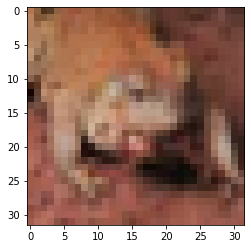

In [28]:
plt.imshow(X_test[5])

In [33]:
y_pred = cnn.predict(X_test)

In [34]:
y_pred

array([[9.5384289e-04, 2.4165296e-04, 6.3691763e-03, ..., 3.8929058e-03,
        6.8605110e-02, 2.5205901e-03],
       [4.0246411e-03, 4.9892794e-02, 7.7428564e-07, ..., 5.1899860e-07,
        9.4561636e-01, 4.4871680e-04],
       [6.4055413e-01, 4.3345690e-02, 1.3255468e-02, ..., 1.3643082e-02,
        2.5212303e-01, 1.8685719e-02],
       ...,
       [4.4730215e-04, 7.3205219e-06, 2.9032183e-01, ..., 9.8723799e-02,
        4.7306248e-04, 4.7080110e-05],
       [7.3310204e-02, 7.3185050e-01, 2.1231474e-04, ..., 9.1100455e-04,
        1.8145752e-03, 6.7265062e-03],
       [1.0416188e-05, 2.5656451e-05, 3.7439335e-05, ..., 9.4308031e-01,
        6.2192004e-05, 1.0870205e-05]], dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 0, 0, 4, 6, 1, 6, 3, 1]

In [40]:
Y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print("Classification Report \n\n",classification_report(y_classes,Y_test))

Classification Report 

               precision    recall  f1-score   support

           0       0.73      0.63      0.68      1155
           1       0.79      0.74      0.76      1075
           2       0.46      0.56      0.51       812
           3       0.36      0.52      0.43       707
           4       0.62      0.54      0.58      1139
           5       0.58      0.53      0.56      1101
           6       0.63      0.81      0.71       773
           7       0.76      0.62      0.68      1231
           8       0.77      0.74      0.75      1045
           9       0.70      0.73      0.71       962

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.66      0.64      0.65     10000

